In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import xarray as xr
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools, places
import gsw 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import math
from scipy import io
import pickle
import cmocean
from salishsea_tools import Keegan_eval_tools as ket
import json
from collections import OrderedDict
from matplotlib.colors import LogNorm
import arrow
import glob
import datetime

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline

In [2]:
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/mesh_mask202108.nc') as mesh:
    tmask=np.copy(mesh.variables['tmask'][0,:,:,:])
    navlat=np.copy(mesh.variables['nav_lat'][:,:])
    navlon=np.copy(mesh.variables['nav_lon'][:,:])

In [3]:
ij,ii=(500,240) #north of S3

In [4]:
yearList = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

data = 'month-avg.202111'
#year = '2014'
month = '01'
file = 'grid'

for year in yearList:
    files=[glob.glob(f'/results2/SalishSea/{data}/SalishSeaCast_1m_{file}_T_*{year}*{month:02d}01_*{year}*{month:02d}??.nc')[0] for year in yearList for month in range(1,13) ]




In [5]:
#files

In [6]:
## Gathering metadata but still not opening the files
dsfiles = xr.open_mfdataset(
        files,
        #chunks=chunk_size,
        compat="override",
        coords="minimal",
        data_vars="minimal",
        drop_variables=['sossheig','vosaline','sigma_theta','e3t'],
        parallel=True,
        engine='netcdf4'
    )

In [7]:
tt=np.array(dsfiles.time)
mod_depth=np.array(dsfiles.depth)
mod_votemper=(dsfiles.votemper.isel(gridY=ij,gridX=ii))

mod_votemper = (np.array(mod_votemper))
mod_votemper = np.ma.masked_equal(mod_votemper,0).T

In [8]:
start= dt.datetime(2007,1,1)
end=dt.datetime(2022,12,31)

In [9]:
date_range=(start,end)

In [10]:
mod_votemper.min()

5.3383107

In [11]:

mod_votemper.max()

21.826242

In [12]:
tt.min()

numpy.datetime64('2007-01-15T12:00:00.000000000')

/ocean/ksuchy/MOAD/tools/SalishSeaTools/salishsea_tools/Keegan_eval_tools.py:816: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=20)


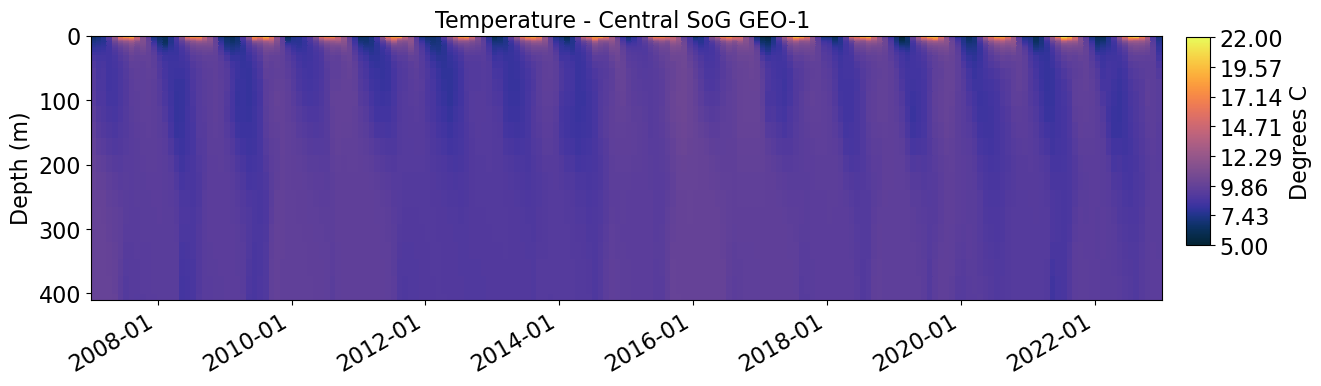

In [13]:

ax=ket.hovmoeller(mod_votemper, mod_depth, tt,(0,410),date_range, title='Temperature - Central SoG GEO-1 ',
               var_title='Degrees C',vmax=5,vmin=22,cmap=cmo.cm.thermal)



ax.set_ylabel('Depth (m)')
ax.set_xlabel('')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))



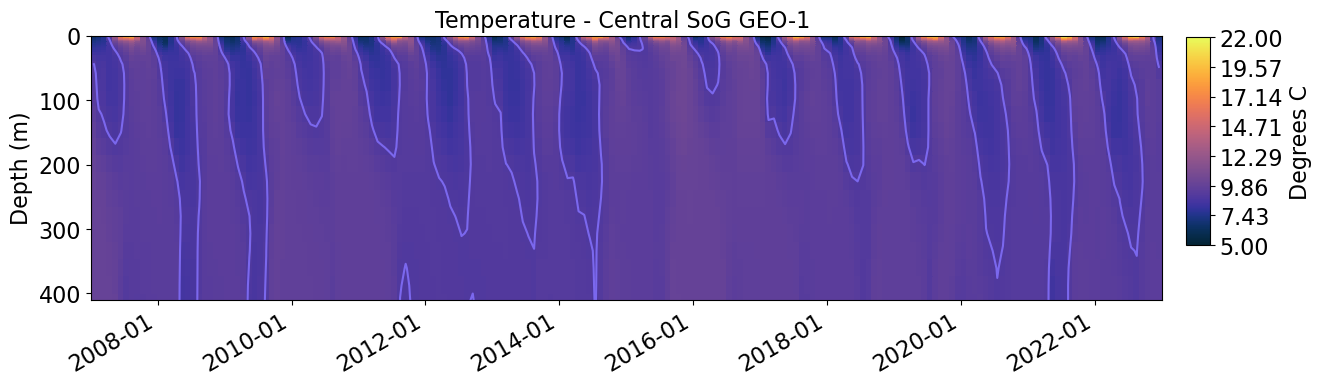

In [14]:
ax=ket.hovmoeller(mod_votemper, mod_depth, tt,(0,410),date_range, title='Temperature - Central SoG GEO-1 ',
               var_title='Degrees C',vmax=5,vmin=22,cmap=cmo.cm.thermal)



ax.set_ylabel('Depth (m)')
ax.set_xlabel('')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

contour_value = 9
contour = ax.contour(tt, mod_depth, mod_votemper, levels=[contour_value], colors='mediumslateblue')

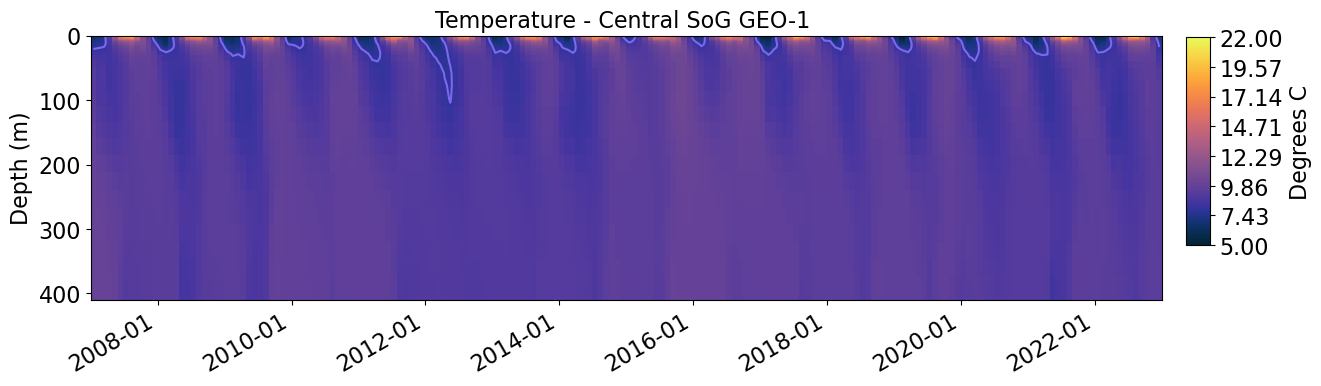

In [17]:
ax=ket.hovmoeller(mod_votemper, mod_depth, tt,(0,410),date_range, title='Temperature - Central SoG GEO-1 ',
               var_title='Degrees C',vmax=5,vmin=22,cmap=cmo.cm.thermal)



ax.set_ylabel('Depth (m)')
ax.set_xlabel('')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

contour_value = 8
contour = ax.contour(tt, mod_depth, mod_votemper, levels=[contour_value], colors='mediumslateblue')